In [14]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble

In [15]:
from collections import Counter
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [37]:
df=pd.read_csv(r'C:\Users\Mollie\Documents\Uni 3\AI\AI project\ActualActualData\training_autoencoded_16.csv')
df_ROS=pd.read_csv(r'C:\Users\Mollie\Documents\Uni 3\AI\AI project\ActualActualData\training_ros_autoencoded_16.csv')
df_RUS=pd.read_csv(r'C:\Users\Mollie\Documents\Uni 3\AI\AI project\ActualActualData\training_rus_autoencoded_16.csv')
df_SMOTE=pd.read_csv(r'C:\Users\Mollie\Documents\Uni 3\AI\AI project\ActualActualData\training_smote_autoencoded_16.csv')
df_cnn=pd.read_csv(r'C:\Users\Mollie\Documents\Uni 3\AI\AI project\ActualActualData\training_cnn_autoencoded_16.csv')
#df_cnn_autoe=pd.read_csv(r'C:\Users\Mollie\Documents\Uni 3\AI\AI project\ActualActualData\training_cnn_autoencoded.csv')
df_test=pd.read_csv(r'C:\Users\Mollie\Documents\Uni 3\AI\AI project\ActualActualData\test_autoencoded_16.csv')
df.head()
x_train=df.iloc[:,:-1]
y_train=df.iloc[:,-1]
x_ov=df_ROS.iloc[:,:-1]
y_ov=df_ROS.iloc[:,-1]
x_under = df_RUS.iloc[:,:-1]
y_under=df_RUS.iloc[:,-1]
x_smote=df_SMOTE.iloc[:,:-1]
y_smote=df_SMOTE.iloc[:,-1]
x_test=df_test.iloc[:,:-1]
y_test=df_test.iloc[:,-1]
x_cnn=df_cnn.iloc[:,:-1]
y_cnn=df_cnn.iloc[:,-1]
x_cnn_autoe=df_cnn.iloc[:,:-1]
y_cnn_autoe=df_cnn.iloc[:,-1]
accuracy_no_sampling=[]
accuracy_over_sampling=[]
accuracy_under_sampling=[]
accuracy_smote_sampling=[]
accuracy_cnn_sampling=[]
f1_no_sampling=[]
f1_over_sampling=[]
f1_under_sampling=[]
f1_smote_sampling=[]
f1_cnn_sampling=[]
precision_no_sampling=[]
precision_over_sampling=[]
precision_under_sampling=[]
precision_smote_sampling=[]
precision_cnn_sampling=[]
recall_no_sampling=[]
recall_over_sampling=[]
recall_under_sampling=[]
recall_smote_sampling=[]
recall_cnn_sampling=[]

In [99]:
df.shape

(21000, 24)

In [230]:
#plot graph to work out optimal for adaboost

def optimal_est(x_train, y_train, learnrate, estimators, x_test):
    accuracy_dict={}
    f1_dict={}
    precision_dict = {}
    recall_dict = {}
    for i in learnrate:
        accuracy_dict[i]=[]
        f1_dict[i]=[]
        precision_dict[i]=[]
        recall_dict[i]=[]
        for j in estimators:
            clf_ada = AdaBoostClassifier(n_estimators=j,learning_rate=i)
            clf_osamp_ada=clf_ada.fit(x_ov,y_ov)
            clf_osamp_prediction_ada=clf_osamp_ada.predict(x_test)
            clf_osamp_accuracy_ada=accuracy_score(clf_osamp_prediction_ada,y_test)
            clf_osamp_f1_ada=f1_score(clf_osamp_prediction_ada,y_test)
            clf_osamp_precision_ada=precision_score(clf_osamp_prediction_ada,y_test)
            clf_osamp_recall_ada=recall_score(clf_osamp_prediction_ada,y_test)
            accuracy_dict[i].append(clf_osamp_accuracy_ada)
            f1_dict[i].append(clf_osamp_f1_ada)
            precision_dict[i].append(clf_osamp_precision_ada)
            recall_dict[i].append(clf_osamp_recall_ada)
       
        
        plt.plot(estimators,accuracy_dict[i])
        plt.title('accuracy graph learnrate = ' +str(i))
        #plt.ylabel('estimators')
        plt.show()
        plt.plot(estimators, f1_dict[i])
        plt.title('f1 graph learnrate = ' +str(i))
        #plt.ylabel('estimators')
        plt.show()
        plt.plot(estimators,recall_dict[i])
        plt.title('recall graph learnrate = ' +str(i))
        plt.ylabel('estimators')
        plt.show()
        plt.plot(estimators, precision_dict[i])
        plt.title('precision graph learnrate = ' +str(i))
        plt.ylabel('estimators')
        plt.show()
    return accuracy_dict, f1_dict, precision_dict, recall_dict
    #plt.plot(learnrate,accuracy_list11)
    #plt.show()
    #plt.plot(learnrate,f1_list11)
    #plt.show()
    #plt.plot(learnrate,recall_list11)
    #plt.show()
    #plt.plot(learnrate, precision_list11)
    #plt.show()

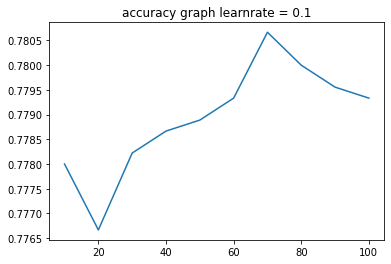

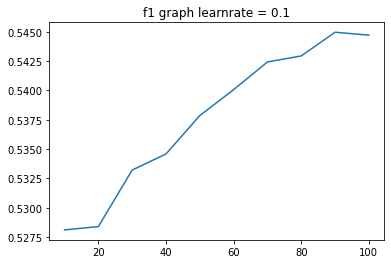

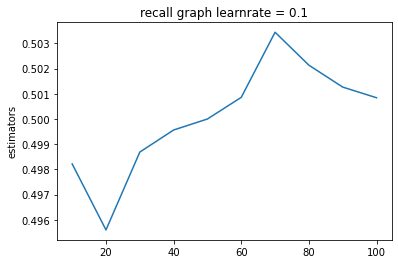

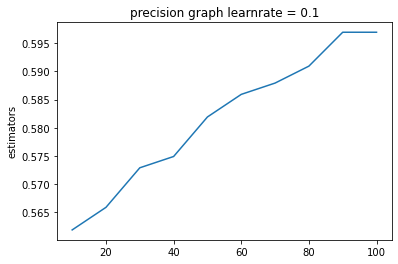

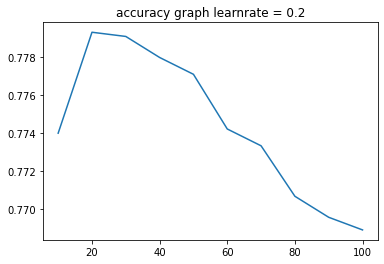

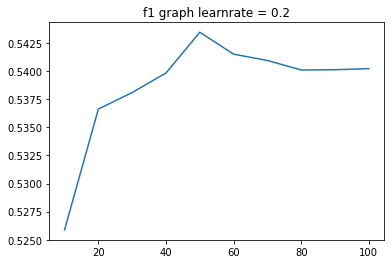

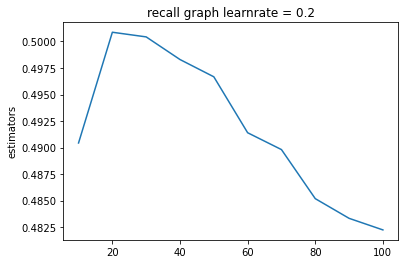

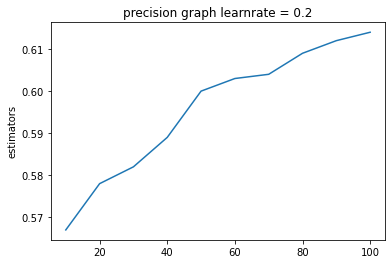

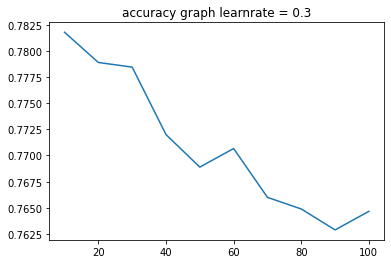

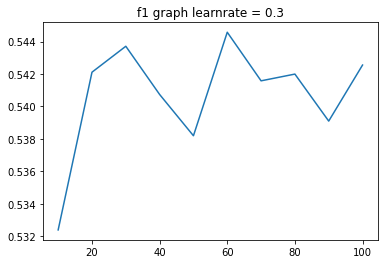

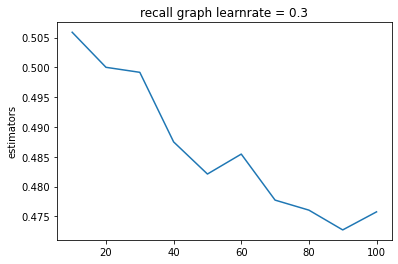

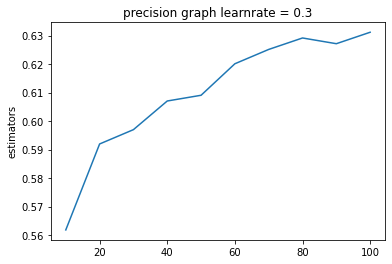

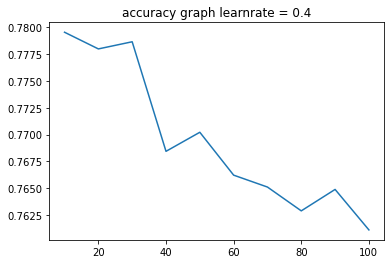

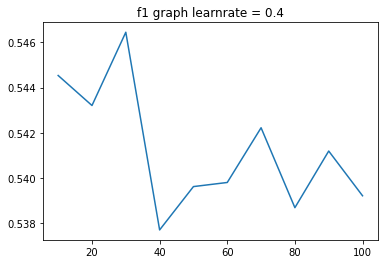

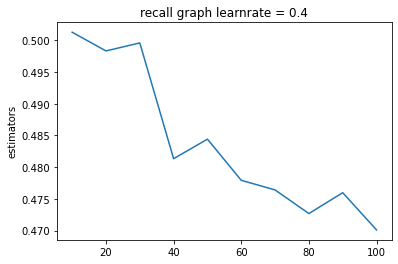

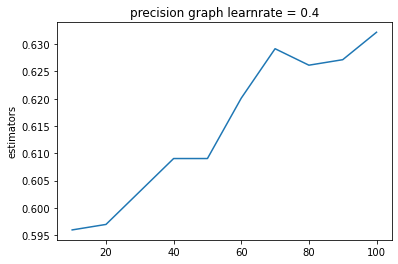

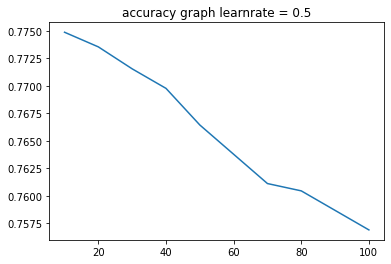

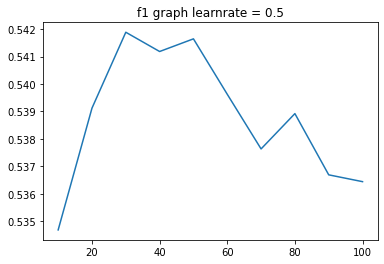

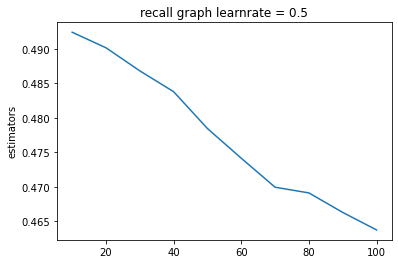

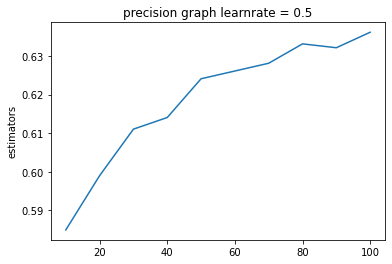

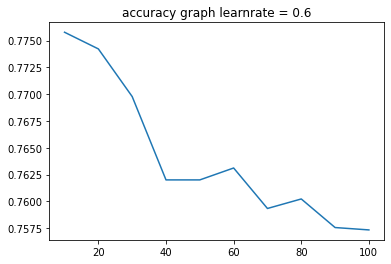

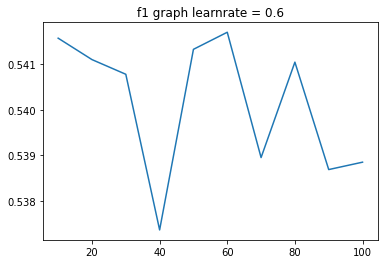

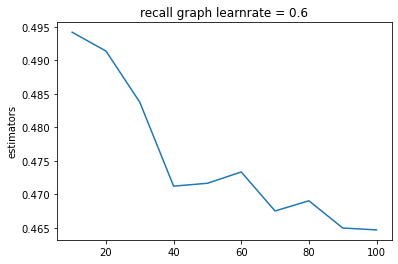

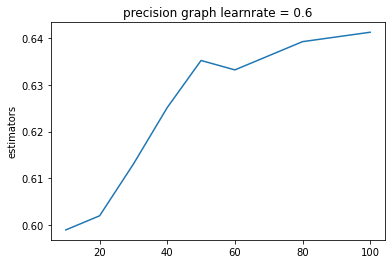

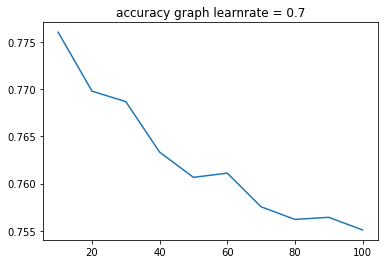

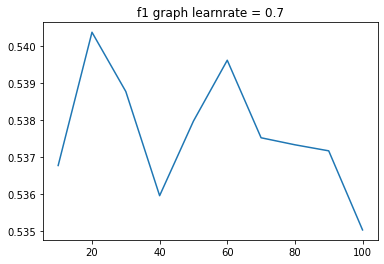

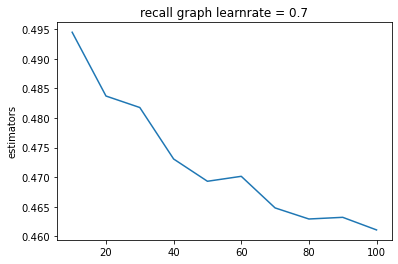

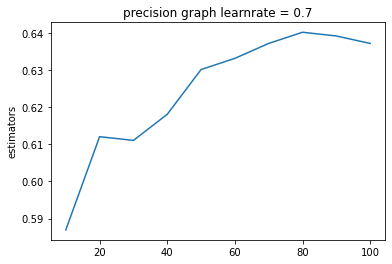

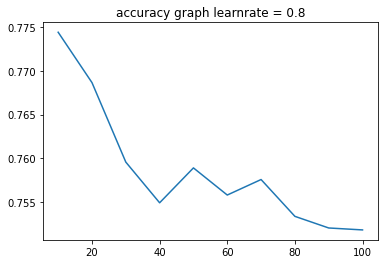

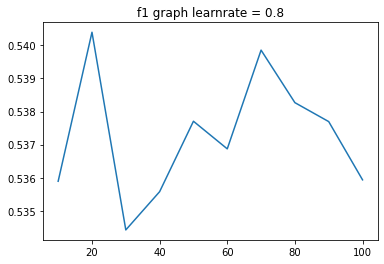

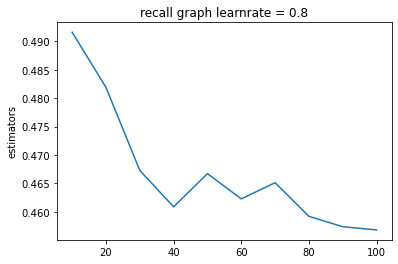

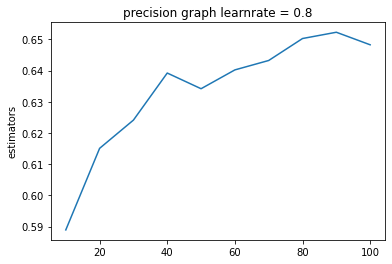

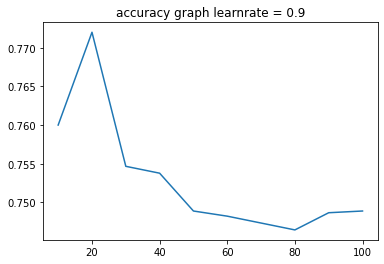

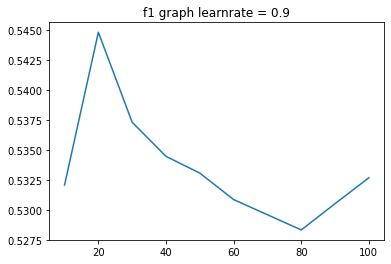

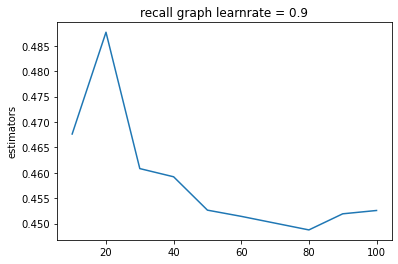

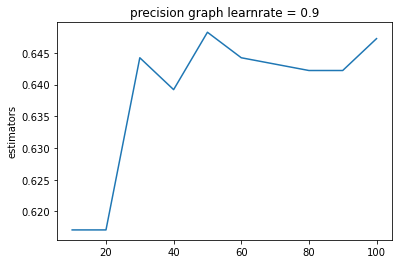

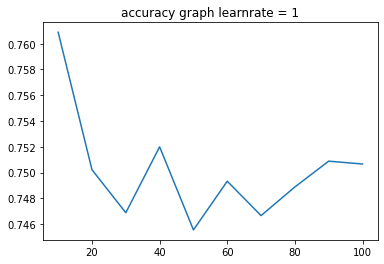

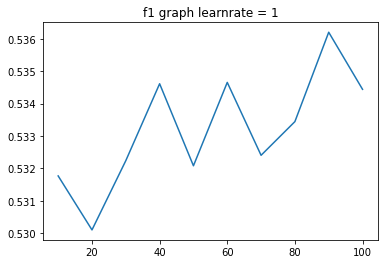

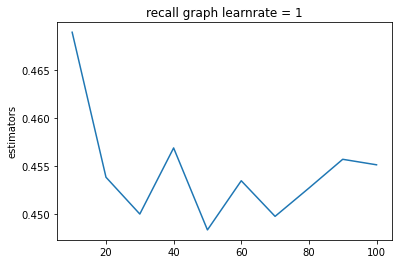

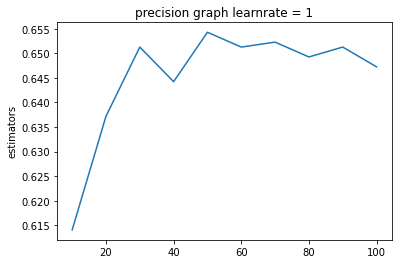

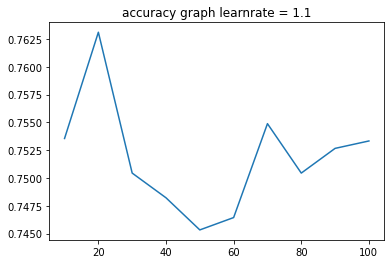

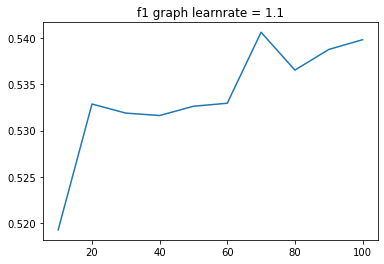

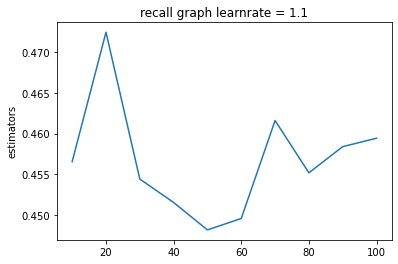

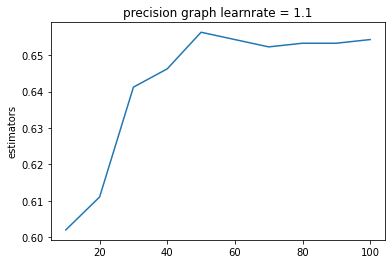

In [231]:
accuracy_dict, f1_dict, precision_dict, recall_dict=optimal_est(x_train,y_train,[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1],[10,20,30,40,50,60,70,80,90,100],x_test)

In [253]:
#finds optimal 
learnrate1=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1]
estimator1=[10,20,30,40,50,60,70,80,90,100]
print('best acc')
best_acc=0
nbest=0
mbest=0
for n in learnrate1:
    best_acc=best_acc
    for m in range(len(estimator1)):
        if accuracy_dict[n][m]>best_acc:
            best_acc = accuracy_dict[n][m]
            nbest=n
            mbest=estimator1[m]
        else:  
            continue
print(best_acc)
print(nbest,mbest)

print('best f1')
best_f1=0
nbestf1=0
mbestf1=0
for n in learnrate1:
    best_f1=best_f1
    for m in range(len(estimator1)):
        if f1_dict[n][m]>best_f1:
            best_f1 = f1_dict[n][m]
            nbestf1=n
            mbestf1=estimator1[m]
        else:  
            continue
print(best_f1)
print(nbestf1,mbestf1)

print('best recall')
best_recall=0
nbestrecall=0
mbestrecall=0
for n in learnrate1:
    best_recall=best_recall
    for m in range(len(estimator1)):
        if recall_dict[n][m]>best_recall:
            best_recall = recall_dict[n][m]
            nbestrecall=n
            mbestrecall=estimator1[m]
        else:  
            continue
print(best_recall)
print(nbestrecall,mbestrecall)

print('best precision')
best_precision=0
nbestprecision=0
mbestprecision=0
for n in learnrate1:
    best_precision=best_precision
    for m in range(len(estimator1)):
        if precision_dict[n][m]>best_precision:
            best_precision = precision_dict[n][m]
            nbestprecision=n
            mbestprecision=estimator1[m]
        else:  
            continue
print(best_precision)
print(nbestf1,mbestprecision)
    

best acc
0.7817777777777778
0.3 10
best f1
0.546448087431694
0.4 30
best recall
0.5058823529411764
0.3 10
best precision
0.6562814070351759
0.4 50


In [ ]:
#check the model isnt overfitting
ada_nosamp=ada.fit(x_train,y_train)
ada_nosamp_prediction=ada_nosamp.predict(x_test)
trainingpred=ada_nosamp.predict(x_train)
recall12= recall_score(trainingpred, y_train)
recall123=recall_score(ada_nosamp_prediction,y_test)
recall_scores=[recall12,recall123]
names12=['training set','test set']
plt.bar(names12, recall_scores)
plt.show()

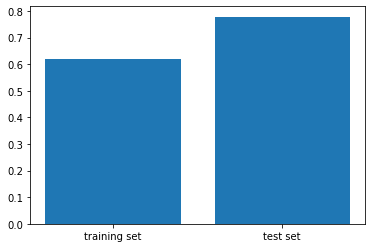

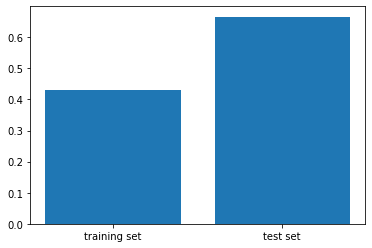

In [256]:
#undersamp overfit
clf_undersamp=clf.fit(x_under,y_under)
clf_undersamp_prediction=clf_undersamp.predict(x_test)
clf_undersamp_prediction1=clf_undersamp.predict(x_train)
clf_undersamp_accuracy=accuracy_score(clf_undersamp_prediction,y_test)
clf_undersamp_accuracy1=accuracy_score(clf_undersamp_prediction1,y_train)
clf_undersamp_f1=f1_score(clf_undersamp_prediction,y_test)
clf_undersamp_f11=f1_score(clf_undersamp_prediction1,y_train)
#clf_undersamp_fbeta=fbeta_score(clf_undersamp_prediction,y_test,beta=0.8)
clf_undersampacc=[clf_undersamp_accuracy,clf_undersamp_accuracy1]
clf_undersampf1=[clf_undersamp_f1,clf_undersamp_f11]
names12clf_undersamp=['training set','test set']
plt.bar(names12clf_undersamp, clf_undersampacc)
plt.show()
plt.bar(names12clf_undersamp, clf_undersampf1)
plt.show()
#my decision tree is massivly underfitting


In [6]:
#we first find the optimal number of trees in the random forest (TAKES AGES TO RUN) and from the results choose 100 also not sure why zigzag
def optimal_trees(x_train, y_train, array, x_test):
    accuracy_list =[]
    f1_list=[]
    for i in array:
        rfc =ensemble.RandomForestClassifier(n_estimators=i)
        rfc_nosamp=rfc.fit(x_train,y_train)
        rfc_nosamp_prediction=rfc_nosamp.predict(x_test)
        rfc_nosamp_accuracy=accuracy_score(rfc_nosamp_prediction,y_test)
        rfc_nosamp_f1=f1_score(rfc_nosamp_prediction,y_test)
        rfc_nosamp_scores= [rfc_nosamp_accuracy, rfc_nosamp_f1]
        accuracy_list.append(rfc_nosamp_accuracy)
        f1_list.append(rfc_nosamp_f1)
    print(accuracy_list,f1_list)
    plt.plot(array, accuracy_list)
    plt.xlabel('no_of_tres')
    plt.ylabel('score')
    plt.show()
    plt.plot(array, f1_list)
    plt.show()
    return('hi')
 

In [7]:
optimal_trees(x_train,y_train,[30,40,50,60,70,80,90,100,110,120,130,140,150,160],x_test)

C:\Users\Mollie\Documents\python\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 0
- 1
- 10
- 11
- 12
- ...
Feature names seen at fit time, yet now missing:
- AGE
- EDUCATION
- LIMIT_BAL
- MARRIAGE
- SEX
- ...

  warnings.warn(message, FutureWarning)


ValueError: X has 16 features, but RandomForestClassifier is expecting 23 features as input.

In [17]:
#use graphs to decide learning rate and n_est of ada
from sklearn.ensemble import AdaBoostClassifier
clf =tree.DecisionTreeClassifier()
ada = AdaBoostClassifier(n_estimators=30,learning_rate=0.4)
rfc =ensemble.RandomForestClassifier(n_estimators=100)

In [38]:
#nosampling decsiion tree
clf_nosamp=clf.fit(x_train,y_train)
clf_nosamp_prediction=clf_nosamp.predict(x_test)
clf_nosamp_accuracy=accuracy_score(clf_nosamp_prediction,y_test)
clf_nosamp_f1=f1_score(clf_nosamp_prediction,y_test)
clf_nosamp_precision=precision_score(clf_nosamp_prediction,y_test)
clf_nosamp_recall=recall_score(clf_nosamp_prediction,y_test)
clf_nosamp=[clf_nosamp_accuracy,clf_nosamp_f1]
accuracy_no_sampling.append(clf_nosamp_accuracy)
f1_no_sampling.append(clf_nosamp_f1)
precision_no_sampling.append(clf_nosamp_precision)
recall_no_sampling.append(clf_nosamp_recall)
print(f1_no_sampling)

[0.27985524728588657]


In [39]:
#nosampling decsiion tree adaboost
ada_nosamp=ada.fit(x_cnn_autoe,y_cnn_autoe)
ada_nosamp_prediction=ada_nosamp.predict(x_test)
ada_nosamp_accuracy=accuracy_score(ada_nosamp_prediction,y_test)
ada_nosamp_f1=f1_score(ada_nosamp_prediction,y_test)
ada_nosamp_precision=precision_score(ada_nosamp_prediction,y_test)
ada_nosamp_recall=recall_score(ada_nosamp_prediction,y_test)
#ada_nosamp=[ada_nosamp_accuracy,ada_nosamp_f1]
accuracy_no_sampling.append(ada_nosamp_accuracy)
f1_no_sampling.append(ada_nosamp_f1)
precision_no_sampling.append(ada_nosamp_precision)
recall_no_sampling.append(ada_nosamp_recall)
print(accuracy_no_sampling,ada_nosamp_f1)


[0.602, 0.6453333333333333] 0.36363636363636365


In [40]:
#oversampling dec tree
#now we make the decision tree with our new smaples
clf_oversamp=clf.fit(x_ov,y_ov)
clf_oversamp_prediction=clf_oversamp.predict(x_test)
clf_oversamp_accuracy=accuracy_score(clf_oversamp_prediction,y_test)
clf_oversamp_f1=f1_score(clf_oversamp_prediction,y_test)
clf_oversamp_precision=precision_score(clf_oversamp_prediction,y_test)
clf_oversamp_recall=recall_score(clf_oversamp_prediction,y_test)
#clf_oversamp=[oversamp_accuracy,oversamp_f1]
accuracy_over_sampling.append(clf_oversamp_accuracy)
f1_over_sampling.append(clf_oversamp_f1)
precision_over_sampling.append(clf_oversamp_precision)
recall_over_sampling.append(clf_oversamp_recall)

In [41]:
########################################
#oversampling ada 
ada_oversamp=ada.fit(x_ov,y_ov)
ada_oversamp_prediction=ada_oversamp.predict(x_test)
ada_oversamp_accuracy=accuracy_score(ada_oversamp_prediction,y_test)
ada_oversamp_f1=f1_score(ada_oversamp_prediction,y_test)
ada_oversamp_precision=precision_score(ada_oversamp_prediction,y_test)
ada_oversamp_recall=recall_score(ada_oversamp_prediction,y_test)
#ada_oversamp=[ada_oversamp_accuracy,ada_oversamp_f1]
accuracy_over_sampling.append(ada_oversamp_accuracy)
f1_over_sampling.append(ada_oversamp_f1)
precision_over_sampling.append(ada_oversamp_precision)
recall_over_sampling.append(ada_oversamp_recall)
print(ada_oversamp_accuracy,ada_oversamp_f1)

0.2653333333333333 0.330498177399757


In [42]:
#undersampling dectree
clf_undersamp=clf.fit(x_under,y_under)
clf_undersamp_prediction=clf_undersamp.predict(x_test)
clf_undersamp_accuracy=accuracy_score(clf_undersamp_prediction,y_test)
clf_undersamp_f1=f1_score(clf_undersamp_prediction,y_test)
clf_undersamp_precision=precision_score(clf_undersamp_prediction,y_test)
clf_undersamp_recall=recall_score(clf_undersamp_prediction,y_test)
#clf_undersamp=[clf_undersamp_accuracy,clf_undersamp_f1]
accuracy_under_sampling.append(clf_undersamp_accuracy)
f1_under_sampling.append(clf_undersamp_f1)
precision_under_sampling.append(clf_undersamp_precision)
recall_under_sampling.append(clf_undersamp_recall)

In [43]:
#undersampling ada
ada_undersamp=ada.fit(x_under,y_under)
ada_undersamp_prediction=ada_undersamp.predict(x_test)
ada_undersamp_accuracy=accuracy_score(ada_undersamp_prediction,y_test)
ada_undersamp_f1=f1_score(ada_undersamp_prediction,y_test)
ada_undersamp_precision=precision_score(ada_undersamp_prediction,y_test)
ada_undersamp_recall=recall_score(ada_undersamp_prediction,y_test)
#ada_undersamp=[ada_undersamp_accuracy,ada_undersamp_f1]
accuracy_under_sampling.append(ada_undersamp_accuracy)
f1_under_sampling.append(ada_undersamp_f1)
precision_under_sampling.append(ada_undersamp_precision)
recall_under_sampling.append(ada_undersamp_recall)

In [44]:
#smote sampling dectree
clf_oversamp_smote=clf.fit(x_smote,y_smote)
clf_oversamp_smote_prediction=clf_oversamp_smote.predict(x_test)
clf_oversamp_smote_accuracy=accuracy_score(clf_oversamp_smote_prediction,y_test)
clf_oversamp_smote_f1=f1_score(clf_oversamp_smote_prediction,y_test)
clf_oversamp_smote_precision=precision_score(clf_oversamp_smote_prediction,y_test)
clf_oversamp_smote_recall=recall_score(clf_oversamp_smote_prediction,y_test)
#clf_smote=[oversamp_smote_accuracy,oversamp_smote_f1]
accuracy_smote_sampling.append(clf_oversamp_smote_accuracy)
f1_smote_sampling.append(clf_oversamp_smote_f1)
precision_smote_sampling.append(clf_oversamp_smote_precision)
recall_smote_sampling.append(clf_oversamp_smote_recall)

In [45]:
#smote sampling ada
ada_oversamp_smote=ada.fit(x_smote,y_smote)
ada_oversamp_smote_prediction=ada_oversamp_smote.predict(x_test)
ada_oversamp_smote_accuracy=accuracy_score(ada_oversamp_smote_prediction,y_test)
ada_oversamp_smote_f1=f1_score(ada_oversamp_smote_prediction,y_test)
ada_oversamp_smote_precision=precision_score(ada_oversamp_smote_prediction,y_test)
ada_oversamp_smote_recall=recall_score(ada_oversamp_smote_prediction,y_test)##
#ada_smote=[ada_oversamp_smote_accuracy,ada_oversamp_smote_f1]
accuracy_smote_sampling.append(ada_oversamp_smote_accuracy)
f1_smote_sampling.append(ada_oversamp_smote_f1)
precision_smote_sampling.append(ada_oversamp_smote_precision)
recall_smote_sampling.append(ada_oversamp_smote_recall)

C:\Users\Mollie\Documents\python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
#cnn sampling dectree 
clf_oversamp_cnn=clf.fit(x_cnn,y_cnn)
clf_oversamp_cnn_prediction=clf_oversamp_cnn.predict(x_test)
clf_oversamp_cnn_accuracy=accuracy_score(clf_oversamp_cnn_prediction,y_test)
clf_oversamp_cnn_f1=f1_score(clf_oversamp_cnn_prediction,y_test)
clf_oversamp_cnn_recall=recall_score(clf_oversamp_cnn_prediction,y_test)
clf_oversamp_cnn_precision=precision_score(clf_oversamp_cnn_prediction,y_test)
#clf_cnn=[oversamp_smote_accuracy,oversamp_cnn_f1]
accuracy_cnn_sampling.append(clf_oversamp_cnn_accuracy)
f1_cnn_sampling.append(clf_oversamp_cnn_f1)
recall_cnn_sampling.append(clf_oversamp_cnn_recall)
precision_cnn_sampling.append(clf_oversamp_cnn_precision)

In [47]:
#cnn sampling ada
ada_oversamp_cnn=ada.fit(x_cnn,y_cnn)
ada_oversamp_cnn_prediction=ada_oversamp_cnn.predict(x_test)
ada_oversamp_cnn_accuracy=accuracy_score(ada_oversamp_cnn_prediction,y_test)
ada_oversamp_cnn_f1=f1_score(ada_oversamp_cnn_prediction,y_test)
ada_oversamp_cnn_precision=precision_score(ada_oversamp_cnn_prediction,y_test)
ada_oversamp_cnn_recall=recall_score(ada_oversamp_cnn_prediction,y_test)
#ada_smote=[ada_oversamp_smote_accuracy,ada_oversamp_smote_f1]
accuracy_cnn_sampling.append(ada_oversamp_cnn_accuracy)
f1_cnn_sampling.append(ada_oversamp_cnn_f1)
precision_cnn_sampling.append(ada_oversamp_cnn_precision)
recall_cnn_sampling.append(ada_oversamp_cnn_recall)

In [48]:
#rfc nosampling
rfc_nosamp=rfc.fit(x_train,y_train)
rfc_nosamp_prediction=rfc_nosamp.predict(x_test)
rfc_nosamp_accuracy=accuracy_score(rfc_nosamp_prediction,y_test)
rfc_nosamp_f1=f1_score(rfc_nosamp_prediction,y_test)
rfc_nosamp_precision=precision_score(rfc_nosamp_prediction,y_test)
rfc_nosamp_recall=recall_score(rfc_nosamp_prediction,y_test)
#rfc_nosamp_scores= [rfc_nosamp_accuracy, rfc_nosamp_f1]
#rfc_nosamp=[rfc_nosamp_scores]
accuracy_no_sampling.append(rfc_nosamp_accuracy)
f1_no_sampling.append(rfc_nosamp_f1)
precision_no_sampling.append(rfc_nosamp_precision)
recall_no_sampling.append(rfc_nosamp_recall)

In [49]:
#rfc oversampling
#now we make the decision tree with our new smaples
rfc_oversamp=rfc.fit(x_ov,y_ov)
rfc_oversamp_prediction=rfc_oversamp.predict(x_test)
rfc_oversamp_accuracy=accuracy_score(rfc_oversamp_prediction,y_test)
rfc_oversamp_f1=f1_score(rfc_oversamp_prediction,y_test)
rfc_oversamp_precision=precision_score(rfc_oversamp_prediction,y_test)
rfc_oversamp_recall=recall_score(rfc_oversamp_prediction,y_test)
#rfc_oversamp=[rfc_oversamp_accuracy,rfc_oversamp_f1]
accuracy_over_sampling.append(rfc_oversamp_accuracy)
f1_over_sampling.append(rfc_oversamp_f1)
precision_over_sampling.append(rfc_oversamp_precision)
recall_over_sampling.append(rfc_oversamp_recall)

In [50]:
#rfc undersampling
#now we make the decision tree with our new smaples
undersamp_rfc=rfc.fit(x_under,y_under)
rfc_undersamp_prediction=undersamp_rfc.predict(x_test)
rfc_undersamp_accuracy=accuracy_score(rfc_undersamp_prediction,y_test)
rfc_undersamp_f1=f1_score(rfc_undersamp_prediction,y_test)
rfc_undersamp_precision=precision_score(rfc_undersamp_prediction,y_test)
rfc_undersamp_recall=recall_score(rfc_undersamp_prediction,y_test)
#rfc_undersamp=[rfc_undersamp_accuracy, rfc_undersamp_f1]
accuracy_under_sampling.append(rfc_undersamp_accuracy)
f1_under_sampling.append(rfc_undersamp_f1)
precision_under_sampling.append(rfc_undersamp_precision)
recall_under_sampling.append(rfc_undersamp_recall)

In [51]:
#rfc smote
rfc_oversamp_smote=rfc.fit(x_smote,y_smote)
rfc_oversamp_smote_prediction=rfc_oversamp_smote.predict(x_test)
rfc_oversamp_smote_accuracy=accuracy_score(rfc_oversamp_smote_prediction,y_test)
rfc_oversamp_smote_f1=f1_score(rfc_oversamp_smote_prediction,y_test)
rfc_oversamp_smote_precision=precision_score(rfc_oversamp_smote_prediction,y_test)
rfc_oversamp_smote_recall=recall_score(rfc_oversamp_smote_prediction,y_test)
#rfc_smote=[rfc_oversamp_smote_accuracy, rfc_oversamp_smote_f1]
accuracy_smote_sampling.append(rfc_oversamp_smote_accuracy)
f1_smote_sampling.append(rfc_oversamp_smote_f1)
precision_smote_sampling.append(rfc_oversamp_smote_precision)
recall_smote_sampling.append(rfc_oversamp_smote_recall)

C:\Users\Mollie\Documents\python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
#rfc cnn
rfc_oversamp_cnn=rfc.fit(x_cnn,y_cnn)
rfc_oversamp_cnn_prediction=rfc_oversamp_cnn.predict(x_test)
rfc_oversamp_cnn_accuracy=accuracy_score(rfc_oversamp_cnn_prediction,y_test)
rfc_oversamp_cnn_f1=f1_score(rfc_oversamp_cnn_prediction,y_test)
rfc_oversamp_cnn_precision=precision_score(rfc_oversamp_cnn_prediction,y_test)
rfc_oversamp_cnn_recall=recall_score(rfc_oversamp_cnn_prediction,y_test)
#rfc_smote=[rfc_oversamp_smote_accuracy, rfc_oversamp_smote_f1]
accuracy_cnn_sampling.append(rfc_oversamp_cnn_accuracy)
f1_cnn_sampling.append(rfc_oversamp_cnn_f1)
precision_cnn_sampling.append(rfc_oversamp_cnn_precision)
recall_cnn_sampling.append(rfc_oversamp_cnn_recall)

In [34]:
accuracy_no_sampling
accuracy_over_sampling
accuracy_under_sampling
accuracy_smote_sampling
f1_no_sampling
f1_over_sampling
f1_under_sampling
f1_smote_sampling

[0.36071911849990335, 0.0, 0.011776251226692836]

In [53]:
print('accuracy')
print(accuracy_no_sampling)
print(accuracy_over_sampling)
print(accuracy_under_sampling)
print(accuracy_smote_sampling)
print(accuracy_cnn_sampling)
print('f1')
print(f1_no_sampling)
print(f1_over_sampling)
print(f1_under_sampling)
print(f1_smote_sampling)
print(f1_cnn_sampling)
print(' prec')
print(precision_no_sampling)
print(precision_over_sampling)
print(precision_under_sampling)
print(precision_smote_sampling)
print(precision_cnn_sampling)
print('recall')
print(recall_no_sampling)
print(recall_over_sampling)
print(recall_under_sampling)
print(recall_smote_sampling)
print(recall_cnn_sampling)


accuracy
[0.602, 0.6453333333333333, 0.6675555555555556]
[0.6811111111111111, 0.2653333333333333, 0.7788888888888889]
[0.49444444444444446, 0.2708888888888889, 0.3426666666666667]
[0.26622222222222225, 0.7788888888888889, 0.7788888888888889]
[0.4182222222222222, 0.6453333333333333, 0.5091111111111111]
f1
[0.27985524728588657, 0.36363636363636365, 0.19569892473118278]
[0.12871888281724347, 0.330498177399757, 0.009950248756218905]
[0.2766295707472178, 0.3677009057621893, 0.37568594343604894]
[0.360573199070488, 0.0, 0.0]
[0.28703703703703703, 0.36363636363636365, 0.28488183878277756]
 prec
[0.349748743718593, 0.45829145728643217, 0.1829145728643216]
[0.10653266331658291, 0.8201005025125628, 0.005025125628140704]
[0.4371859296482412, 0.9587939698492463, 0.8944723618090452]
[0.935678391959799, 0.0, 0.0]
[0.5296482412060302, 0.45829145728643217, 0.44221105527638194]
recall
[0.23324396782841822, 0.30138797091870456, 0.21040462427745665]
[0.16257668711656442, 0.20694902358610195, 0.5]
[0.2023

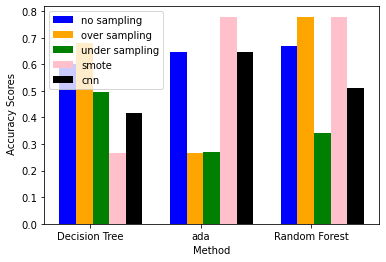

In [54]:
methods=['Decision Tree','ada','Random Forest',]
sampling=['no sampling','over sampling','under sampling','smote','cnn']
x=np.arange(3)
width=0.15

plt.bar(x-0.2, accuracy_no_sampling, width,color='blue')
plt.bar(x-0.05, accuracy_over_sampling, width,color ='orange')
plt.bar(x+0.1, accuracy_under_sampling,width,color='green')
plt.bar(x+0.25, accuracy_smote_sampling, width,color='pink')
plt.bar(x+0.4, accuracy_cnn_sampling, width,color='black')
# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel(' Accuracy Scores')
plt.xlabel('Method')
#ax.set_title('Scores by method and sampling')
plt.xticks(x,methods)
plt.legend(sampling)

plt.show()



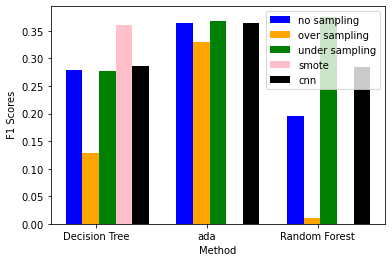

In [55]:
methods=['Decision Tree','ada','Random Forest']
sampling=['no sampling','over sampling','under sampling','smote','cnn']
x=np.arange(3)
width=0.15

plt.bar(x-0.2, f1_no_sampling, width,color='blue')
plt.bar(x-0.05, f1_over_sampling, width,color ='orange')
plt.bar(x+0.1, f1_under_sampling,width,color='green')
plt.bar(x+0.25, f1_smote_sampling, width,color='pink')
plt.bar(x+0.4, f1_cnn_sampling, width,color='black')
# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel(' F1 Scores')
plt.xlabel('Method')
#ax.set_title('Scores by method and sampling')
plt.xticks(x,methods)
plt.legend(sampling)

plt.show()

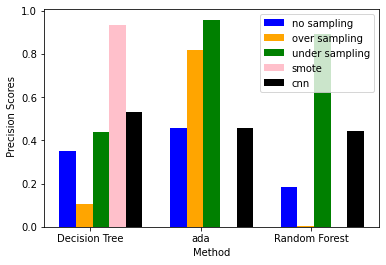

In [56]:
methods=['Decision Tree','ada','Random Forest']
sampling=['no sampling','over sampling','under sampling','smote','cnn']
x=np.arange(3)
width=0.15

plt.bar(x-0.2, precision_no_sampling, width,color='blue')
plt.bar(x-0.05, precision_over_sampling, width,color ='orange')
plt.bar(x+0.1, precision_under_sampling,width,color='green')
plt.bar(x+0.25, precision_smote_sampling, width,color='pink')
plt.bar(x+0.4, precision_cnn_sampling, width,color='black')
# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel(' Precision Scores')
plt.xlabel('Method')
#ax.set_title('Scores by method and sampling')
plt.xticks(x,methods)
plt.legend(sampling)

plt.show()

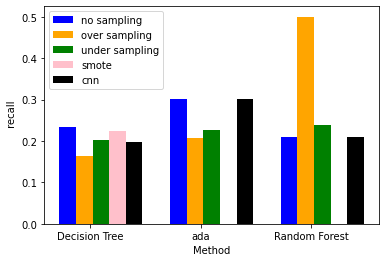

In [57]:
methods=['Decision Tree','ada','Random Forest']
sampling=['no sampling','over sampling','under sampling','smote','cnn']
x=np.arange(3)
width=0.15

plt.bar(x-0.2, recall_no_sampling, width,color='blue')
plt.bar(x-0.05, recall_over_sampling, width,color ='orange')
plt.bar(x+0.1, recall_under_sampling,width,color='green')
plt.bar(x+0.25, recall_smote_sampling, width,color='pink')
plt.bar(x+0.4, recall_cnn_sampling, width,color='black')
# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel(' recall')
plt.xlabel('Method')
#ax.set_title('Scores by method and sampling')
plt.xticks(x,methods)
plt.legend(sampling)

plt.show()